# **Analyzing the Relationship Between Stock Prices and Trading Volume**

<br>



# **1. Introduction**

<br>

The stock market serves as a critical component of the global financial system reflecting the health of economies and the behavior of investors. It is where securities are bought and sold allowing companies to raise capital and investors to gain returns. Two key metrics often analyzed in the stock market are stock prices and trading volumes. Stock prices represent the value of a company as perceived by the market, while trading volume reflects the level of investor activity which indicates how often shares of a stock are bought and sold. Together, these metrics provide a lots of information about market trends and investor behavior.


One of the most intriguing questions in finance is the relationship between stock prices and trading volume. Understanding this relationship can offer valuable insights into market dynamics and help investors make more informed decisions. For instance, does an increase in trading volume signal significant price movements? Or, do large price changes occur independently of trading activity? By investigating these questions, we can better understand how market participants respond to information and whether trading volume can serve as a predictor of price changes.


In this project, we will explore the relationship between stock prices and trading volume for some of the largest companies in the world: **Apple (AAPL), Amazon (AMZN), Google (GOOGL), Meta (META), Microsoft (MSFT) and Nvidia (NVDA)**. Specifically, we aim to answer the question: ***How does trading volume correlate with stock price?*** The analysis will focus on historical data including adjusted closing prices and daily trading volumes which have been sourced from Yahoo Finance. These companies are leaders in the tech industry with high trading volumes and significant stock price movements making them ideal subjects for this study. The data provides a reliable and comprehensive record of market activity which is essential for analyzing trends and patterns.


The analysis will follow a structured data science workflow. The first step involves data acquisition and preprocessing to ensure the dataset is clean and ready for analysis. Next, we will conduct exploratory data analysis (EDA) to examine patterns, calculate descriptive statistics, and identify potential correlations between stock prices and trading volumes. Visualizations such as time-series plots and scatter plots will help illustrate these relationships and make the findings more accessible.


This project is not just an academic exercise but also holds practical significance. Understanding the relationship between trading volume and stock price can help investors identify high-activity periods that might indicate significant price movements. For example, during earnings announcements trading volumes often spike which are then typically accompanied by substantial price changes. By analyzing these patterns across multiple companies, we can assess whether a strong relationship exists and how it can be leveraged for investment strategies.


In summary, this project seeks to uncover the connection between stock prices and trading volume across AAPL, AMZN, GOOGL, META, MSFT, and NVDA while providing insights into market behavior. The findings will contribute to a deeper understanding of market dynamics and may have practical implications for traders, analysts, and individual investors seeking to optimize their strategies. Through a combination of data analysis, visualization, and interpretation, we aim to provide a clear picture of how these two important metrics interact in the financial markets.

<br>

### **Each Stock's Measureable Factors:**

<br>

**Open:**
The open price is the first price at which a stock is traded when the market opens for the day. It represents the starting point of the stock's price for a particular trading session.

<br>

**High:**
The high price refers to the highest price at which a stock traded during the course of the trading day. It reflects the peak value achieved by the stock in that period.

<br>

**Low:**
The low price is the lowest price at which a stock was traded during the trading day. It indicates the bottom value reached during that period.

<br>

**Close:**
The close price is the final price at which the stock traded when the market closed for the day. This is often regarded as the most important price as it reflects the last agreed-upon value between buyers and sellers. It is frequently used to track stock performance over time.

<br>

**Adj Close (Adjusted Close):**
The adjusted close price accounts for events such as stock splits, dividends, and rights offerings that may affect a stock's price. It adjusts the closing price to reflect these factors, providing a more accurate measure of the stock's value over time for comparison and analysis. This is important for long-term analysis, as it reflects the true value of a stock, accounting for corporate actions.

<br>

**Volume:**
Volume refers to the total number of shares traded during a specific time period, such as a day. High volume often indicates high investor interest or market activity, while low volume can suggest less trading interest. Volume is a key metric for assessing the strength of price movements.

<br>

<br>

## **2. Analyses**

<br>

#### **Python Script to Download Data from Yahoo Finance:**

Library used:
yfinance (install using pip install yfinance)

In [ ]:
import yfinance as yf

# Define stock tickers and time range
tickers = ["META", "AMZN", "AAPL", "MSFT", "NVDA", "GOOGL"]
start_date = "2014-11-23"
end_date = "2024-11-23"

# Download data for each ticker and save as CSV
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f"{ticker}_stock_data.csv")
    print(f"Data for {ticker} downloaded and saved as {ticker}_stock_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for META downloaded and saved as META_stock_data.csv
Data for AMZN downloaded and saved as AMZN_stock_data.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for AAPL downloaded and saved as AAPL_stock_data.csv
Data for MSFT downloaded and saved as MSFT_stock_data.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for NVDA downloaded and saved as NVDA_stock_data.csv
Data for GOOGL downloaded and saved as GOOGL_stock_data.csv


#### **Locating the data and importing the data as well as the necessary Python libraries**

In [2]:
# Step 1: Locate and import data
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Set Seaborn's default theme for plot aesthetics
sns.set_theme()

# Step 2: Exploratory Data Analysis (EDA)
# Display basic info about the dataset
import matplotlib.pyplot as plt

In [3]:
# List of file paths to the CSV files
file_paths = [
    "AAPL_stock_data.csv",
    "AMZN_stock_data.csv",
    "GOOGL_stock_data.csv",
    "META_stock_data.csv",
    "MSFT_stock_data.csv",
    "NVDA_stock_data.csv",
]

for file in file_paths:
    df = pd.read_csv(file)

    # Display data
    display(df)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-24,26.418228149414062,29.657499313354492,29.6924991607666,29.155000686645508,29.212499618530273,189803200
3,2014-11-25,26.18885040283203,29.399999618530273,29.9375,29.362499237060547,29.767499923706055,275361600
4,2014-11-26,26.500625610351562,29.75,29.774999618530273,29.457500457763672,29.485000610351562,163073200
...,...,...,...,...,...,...,...
2514,2024-11-18,228.02000427246094,228.02000427246094,229.74000549316406,225.1699981689453,225.25,44686000
2515,2024-11-19,228.27999877929688,228.27999877929688,230.16000366210938,226.66000366210938,226.97999572753906,36211800
2516,2024-11-20,229.0,229.0,229.92999267578125,225.88999938964844,228.05999755859375,35169600
2517,2024-11-21,228.52000427246094,228.52000427246094,230.16000366210938,225.7100067138672,228.8800048828125,42108300


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-24,16.781999588012695,16.781999588012695,16.86949920654297,16.68000030517578,16.73900032043457,55084000
3,2014-11-25,16.75200080871582,16.75200080871582,16.816499710083008,16.56399917602539,16.763500213623047,51300000
4,2014-11-26,16.678499221801758,16.678499221801758,16.732500076293945,16.587499618530273,16.68899917602539,39672000
...,...,...,...,...,...,...,...
2514,2024-11-18,201.6999969482422,201.6999969482422,204.6699981689453,200.9499969482422,204.14999389648438,36512500
2515,2024-11-19,204.61000061035156,204.61000061035156,205.3000030517578,198.77999877929688,199.3300018310547,31197900
2516,2024-11-20,202.8800048828125,202.8800048828125,203.1300048828125,199.4499969482422,202.97999572753906,32769000
2517,2024-11-21,198.3800048828125,198.3800048828125,203.49000549316406,195.75,203.49000549316406,58800000


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-24,27.306385040283203,27.374000549316406,27.559499740600586,27.207500457763672,27.328500747680664,33076000
3,2014-11-25,27.39366912841797,27.46150016784668,27.625,27.345500946044922,27.36050033569336,38072000
4,2014-11-26,27.3188533782959,27.386499404907227,27.493999481201172,27.261499404907227,27.46150016784668,29604000
...,...,...,...,...,...,...,...
2514,2024-11-18,175.3000030517578,175.3000030517578,175.44000244140625,172.89999389648438,173.4199981689453,20206600
2515,2024-11-19,178.1199951171875,178.1199951171875,178.8699951171875,173.55999755859375,173.72000122070312,23434900
2516,2024-11-20,175.97999572753906,175.97999572753906,177.67999267578125,173.77999877929688,177.33999633789062,18997100
2517,2024-11-21,167.6300048828125,167.6300048828125,174.1300048828125,163.6999969482422,173.89999389648438,59734400


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,META,META,META,META,META,META
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-24,73.78783416748047,74.01000213623047,74.3499984741211,73.3499984741211,73.54000091552734,22103800
3,2014-11-25,75.40296173095703,75.62999725341797,75.73999786376953,74.12999725341797,74.20999908447266,32250200
4,2014-11-26,77.38700103759766,77.62000274658203,77.77999877929688,75.51000213623047,75.52999877929688,32695300
...,...,...,...,...,...,...,...
2514,2024-11-18,554.4000244140625,554.4000244140625,559.9000244140625,550.0900268554688,557.0399780273438,14346700
2515,2024-11-19,561.0900268554688,561.0900268554688,561.4299926757812,550.5999755859375,551.8599853515625,9522400
2516,2024-11-20,565.52001953125,565.52001953125,566.3499755859375,554.2000122070312,562.9299926757812,9797300
2517,2024-11-21,563.0900268554688,563.0900268554688,570.0,549.0499877929688,569.52001953125,11154700


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-24,40.865203857421875,47.59000015258789,48.0,47.38999938964844,47.9900016784668,35434200
3,2014-11-25,40.76215744018555,47.470001220703125,47.970001220703125,47.45000076293945,47.65999984741211,28008000
4,2014-11-26,41.00259017944336,47.75,47.9900016784668,47.279998779296875,47.4900016784668,27163600
...,...,...,...,...,...,...,...
2514,2024-11-18,414.9294738769531,415.760009765625,418.3999938964844,412.1000061035156,414.8699951171875,24742000
2515,2024-11-19,416.9554138183594,417.7900085449219,417.94000244140625,411.54998779296875,413.1099853515625,18133500
2516,2024-11-20,414.65997314453125,415.489990234375,417.2900085449219,410.5799865722656,416.8699951171875,19191700
2517,2024-11-21,412.8699951171875,412.8699951171875,419.7799987792969,410.2900085449219,419.5,20780200


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-11-24,0.4939780831336975,0.5145000219345093,0.5167499780654907,0.5105000138282776,0.512499988079071,136004000
3,2014-11-25,0.49373793601989746,0.5142499804496765,0.5180000066757202,0.512499988079071,0.5134999752044678,190240000
4,2014-11-26,0.5021389722824097,0.5230000019073486,0.5235000252723694,0.5109999775886536,0.5112500190734863,219264000
...,...,...,...,...,...,...,...
2514,2024-11-18,140.14999389648438,140.14999389648438,141.5500030517578,137.14999389648438,139.5,221866000
2515,2024-11-19,147.00999450683594,147.00999450683594,147.1300048828125,140.99000549316406,141.32000732421875,227834900
2516,2024-11-20,145.88999938964844,145.88999938964844,147.55999755859375,142.72999572753906,147.41000366210938,309871700
2517,2024-11-21,146.6699981689453,146.6699981689453,152.88999938964844,140.6999969482422,149.35000610351562,400946600


#### **Cleaning the Data**

Fortunately, all of the numerical data provided in each data set will be valuable during our analyses. However, the data needs to be cleaned by removing repeated data, unneccessary columns, and NaN values.

In [ ]:
file_paths = [
    "AAPL_stock_data.csv",
    "AMZN_stock_data.csv",
    "GOOGL_stock_data.csv",
    "META_stock_data.csv",
    "MSFT_stock_data.csv",
    "NVDA_stock_data.csv",
]

for file in file_paths:
    # Define the correct headers for the CSV files
    column_names = [
        "Date",
        "Adj Close",
        "Close",
        "High",
        "Low",
        "Open",
        "Volume",
    ]

    # Read the CSV file, skipping unnecessary rows and setting headers explicitly
    df = pd.read_csv(file, skiprows=3, names=column_names)

    # Drop rows where all values are NaN
    df_cleaned = df.dropna(how="all")

    print(f"Ticker: {file}")

    # Check for duplicate rows (if any exist)
    # duplicates = df[df.duplicated()]
    # print(duplicates)

    # Display data
    display(df_cleaned)

    # Save the cleaned DataFrame to a new CSV file
    df_cleaned.to_csv(f"cleaned_{file}", index=False)

Ticker: AAPL_stock_data.csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-24,26.418228,29.657499,29.692499,29.155001,29.212500,189803200
1,2014-11-25,26.188850,29.400000,29.937500,29.362499,29.767500,275361600
2,2014-11-26,26.500626,29.750000,29.775000,29.457500,29.485001,163073200
3,2014-11-28,26.485037,29.732500,29.850000,29.512501,29.817499,99257600
4,2014-12-01,25.625435,28.767500,29.812500,27.817499,29.702499,335256000
...,...,...,...,...,...,...,...
2512,2024-11-18,228.020004,228.020004,229.740005,225.169998,225.250000,44686000
2513,2024-11-19,228.279999,228.279999,230.160004,226.660004,226.979996,36211800
2514,2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2515,2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


Ticker: AMZN_stock_data.csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-24,16.782000,16.782000,16.869499,16.680000,16.739000,55084000
1,2014-11-25,16.752001,16.752001,16.816500,16.563999,16.763500,51300000
2,2014-11-26,16.678499,16.678499,16.732500,16.587500,16.688999,39672000
3,2014-11-28,16.931999,16.931999,17.063000,16.801500,16.801500,61036000
4,2014-12-01,16.299999,16.299999,17.032000,16.296499,16.906000,98898000
...,...,...,...,...,...,...,...
2512,2024-11-18,201.699997,201.699997,204.669998,200.949997,204.149994,36512500
2513,2024-11-19,204.610001,204.610001,205.300003,198.779999,199.330002,31197900
2514,2024-11-20,202.880005,202.880005,203.130005,199.449997,202.979996,32769000
2515,2024-11-21,198.380005,198.380005,203.490005,195.750000,203.490005,58800000


Ticker: GOOGL_stock_data.csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-24,27.306385,27.374001,27.559500,27.207500,27.328501,33076000
1,2014-11-25,27.393669,27.461500,27.625000,27.345501,27.360500,38072000
2,2014-11-26,27.318853,27.386499,27.493999,27.261499,27.461500,29604000
3,2014-11-28,27.386187,27.454000,27.480000,27.224001,27.350000,24202000
4,2014-12-01,26.915854,26.982500,27.439501,26.931000,27.254499,39888000
...,...,...,...,...,...,...,...
2512,2024-11-18,175.300003,175.300003,175.440002,172.899994,173.419998,20206600
2513,2024-11-19,178.119995,178.119995,178.869995,173.559998,173.720001,23434900
2514,2024-11-20,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2515,2024-11-21,167.630005,167.630005,174.130005,163.699997,173.899994,59734400


Ticker: META_stock_data.csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-24,73.787834,74.010002,74.349998,73.349998,73.540001,22103800
1,2014-11-25,75.402962,75.629997,75.739998,74.129997,74.209999,32250200
2,2014-11-26,77.387001,77.620003,77.779999,75.510002,75.529999,32695300
3,2014-11-28,77.466759,77.699997,78.269997,77.230003,77.669998,15992000
4,2014-12-01,74.874557,75.099998,77.309998,74.800003,77.260002,31789900
...,...,...,...,...,...,...,...
2512,2024-11-18,554.400024,554.400024,559.900024,550.090027,557.039978,14346700
2513,2024-11-19,561.090027,561.090027,561.429993,550.599976,551.859985,9522400
2514,2024-11-20,565.520020,565.520020,566.349976,554.200012,562.929993,9797300
2515,2024-11-21,563.090027,563.090027,570.000000,549.049988,569.520020,11154700


Ticker: MSFT_stock_data.csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-24,40.865204,47.590000,48.000000,47.389999,47.990002,35434200
1,2014-11-25,40.762157,47.470001,47.970001,47.450001,47.660000,28008000
2,2014-11-26,41.002590,47.750000,47.990002,47.279999,47.490002,27163600
3,2014-11-28,41.054100,47.810001,48.200001,47.610001,47.950001,21534400
4,2014-12-01,41.749653,48.619999,48.779999,47.709999,47.880001,31191600
...,...,...,...,...,...,...,...
2512,2024-11-18,414.929474,415.760010,418.399994,412.100006,414.869995,24742000
2513,2024-11-19,416.955414,417.790009,417.940002,411.549988,413.109985,18133500
2514,2024-11-20,414.659973,415.489990,417.290009,410.579987,416.869995,19191700
2515,2024-11-21,412.869995,412.869995,419.779999,410.290009,419.500000,20780200


Ticker: NVDA_stock_data.csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-11-24,0.493978,0.514500,0.516750,0.510500,0.512500,136004000
1,2014-11-25,0.493738,0.514250,0.518000,0.512500,0.513500,190240000
2,2014-11-26,0.502139,0.523000,0.523500,0.511000,0.511250,219264000
3,2014-11-28,0.503339,0.524250,0.527250,0.520000,0.524750,124832000
4,2014-12-01,0.493978,0.514500,0.525000,0.513750,0.522000,190060000
...,...,...,...,...,...,...,...
2512,2024-11-18,140.149994,140.149994,141.550003,137.149994,139.500000,221866000
2513,2024-11-19,147.009995,147.009995,147.130005,140.990005,141.320007,227834900
2514,2024-11-20,145.889999,145.889999,147.559998,142.729996,147.410004,309871700
2515,2024-11-21,146.669998,146.669998,152.889999,140.699997,149.350006,400946600


#### **Calculating Summary Statistics for each Company**

First, we will calculate summary statistics for both adjusted closing prices and trading volumes to establish baselines for comparison. These include measures such as the mean, median, standard deviation, and range, which will help characterize the overall behavior of each stock's price and activity levels.

In [ ]:
cleaned_file_paths = [
    "cleaned_AAPL_stock_data.csv",
    "cleaned_AMZN_stock_data.csv",
    "cleaned_GOOGL_stock_data.csv",
    "cleaned_META_stock_data.csv",
    "cleaned_MSFT_stock_data.csv",
    "cleaned_NVDA_stock_data.csv",
]

for file in cleaned_file_paths:
    df_cleaned = pd.read_csv(file)

    # Calculate summary statistics for the current file
    summary_stats = {
        "Metric": ["Mean", "Median", "Standard Deviation", "Range"],
        "Adj Close": [
            df_cleaned["Adj Close"].mean(),
            df_cleaned["Adj Close"].median(),
            df_cleaned["Adj Close"].std(),
            df_cleaned["Adj Close"].max() - df_cleaned["Adj Close"].min(),
        ],
        "Volume": [
            df_cleaned["Volume"].mean(),
            df_cleaned["Volume"].median(),
            df_cleaned["Volume"].std(),
            df_cleaned["Volume"].max() - df_cleaned["Volume"].min(),
        ],
    }

    summary_df = pd.DataFrame(summary_stats)

    # Format Volume for better readability
    summary_df["Volume"] = summary_df["Volume"].apply(lambda x: f"{x:,.0f}")

    # Display the results for the current file
    print(f"\nSummary Statistics for {file}:")
    display(summary_df)


Summary Statistics for cleaned_AAPL_stock_data.csv:


,Metric,Adj Close,Volume
0,Mean,92.053032,"118,568,145"
1,Median,61.905033,"101,672,400"
2,Standard Deviation,64.277429,"68,772,756"
3,Range,215.522844,"624,776,900"



Summary Statistics for cleaned_AMZN_stock_data.csv:


,Metric,Adj Close,Volume
0,Mean,99.157808,"76,531,017"
1,Median,93.897003,"65,567,300"
2,Standard Deviation,53.492113,"40,534,855"
3,Range,199.752506,"459,496,000"



Summary Statistics for cleaned_GOOGL_stock_data.csv:


,Metric,Adj Close,Volume
0,Mean,80.943802,"35,351,580"
1,Median,62.846882,"31,045,400"
2,Standard Deviation,42.809096,"17,085,624"
3,Range,166.135023,"247,850,000"



Summary Statistics for cleaned_META_stock_data.csv:


,Metric,Adj Close,Volume
0,Mean,216.401519,"23,004,505"
1,Median,180.915298,"19,339,800"
2,Standard Deviation,116.266961,"14,853,061"
3,Range,522.152168,"226,849,100"



Summary Statistics for cleaned_MSFT_stock_data.csv:


,Metric,Adj Close,Volume
0,Mean,178.017800,"28,952,594"
1,Median,140.575012,"25,864,000"
2,Standard Deviation,121.985405,"13,344,299"
3,Range,431.095249,"161,738,400"



Summary Statistics for cleaned_NVDA_stock_data.csv:


,Metric,Adj Close,Volume
0,Mean,19.426428,"467,437,345"
1,Median,6.281912,"415,039,000"
2,Standard Deviation,30.199798,"253,797,372"
3,Range,148.420591,"3,647,284,000"


The ranges of adjusted closing prices and trading volumes provide critical insights into the variability and activity levels of the stocks we are analyzing. These metrics highlight how much each stock's price and trading activity fluctuate over the dataset's 10-year period, offering a preliminary understanding of the volatility and investor interest associated with each company.

**Adjusted Close Price Range**
<br>

The range of adjusted close prices reflects the difference between the highest and lowest adjusted closing prices for each stock. A larger range suggests greater price variability, indicating higher historical volatility.

**Volume Range**
<br>

The range of trading volumes represents the variability in investor activity, measuring the difference between the highest and lowest numbers of shares traded during the 10-year period. Higher ranges often indicate periods of intense interest or reactions to significant market events.


**Key Takeaways**
<br>

_Adjusted Close Prices:_

Meta, Microsoft, and Apple have the widest ranges reflecting higher volatility possibly due to frequent market-moving news. Nvidia has the smallest range indicating relatively stable pricing compared to the others.

_Volume:_

Nvidia's extraordinary volume range is a standout suggesting periods of heightened trading activity. Apple and Amazon show consistent interest with high liquidity, while Meta and Microsoft demonstrate relatively steady trading volumes.

These observations provide a foundation for deeper analysis into the relationship between price variability and trading activity, as well as their implications for market dynamics and investor behavior.

### **Visualizations**

#### **1.Time-Series Plots for Price and Volume**

These plots will show how the adjusted closing prices and trading volumes of each stock evolve over the 10-year period.

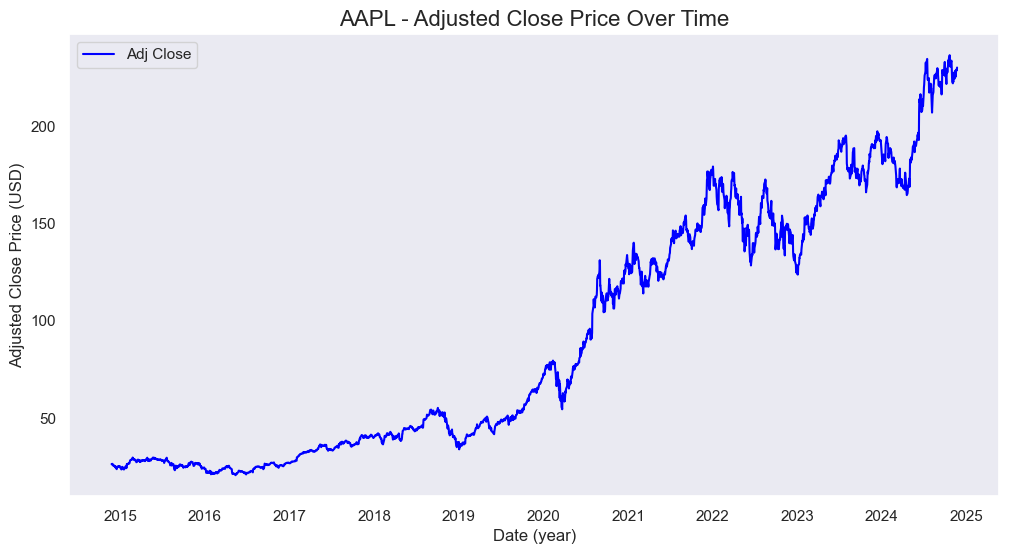

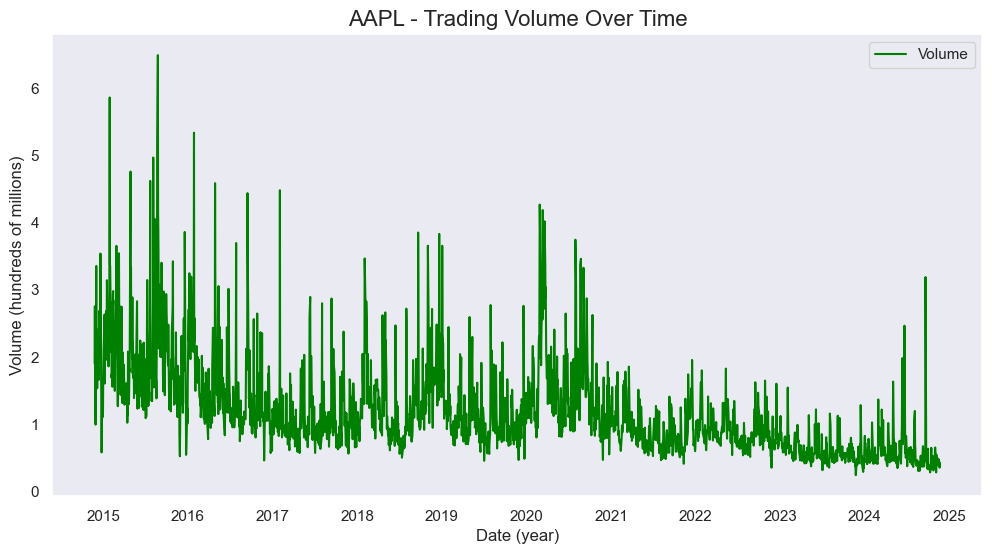

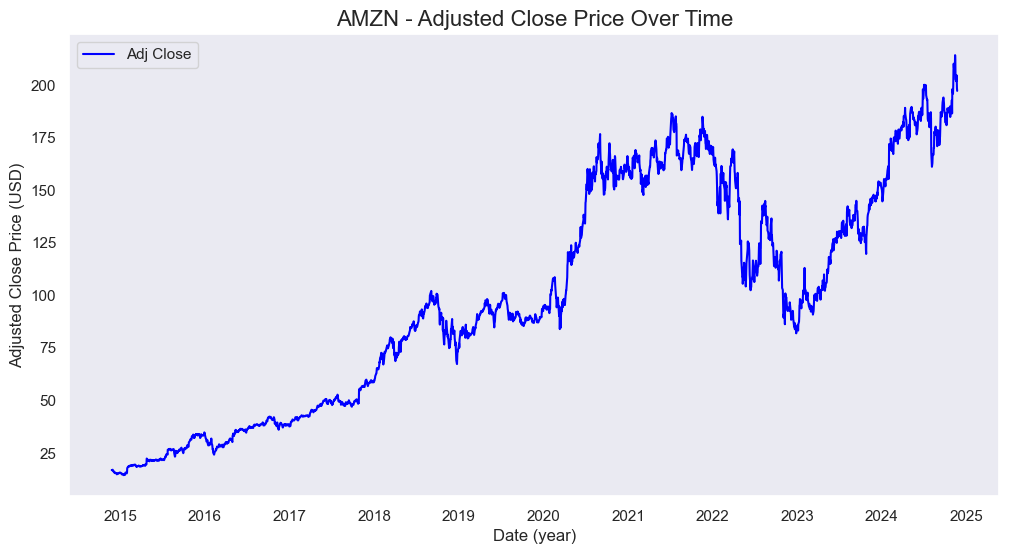

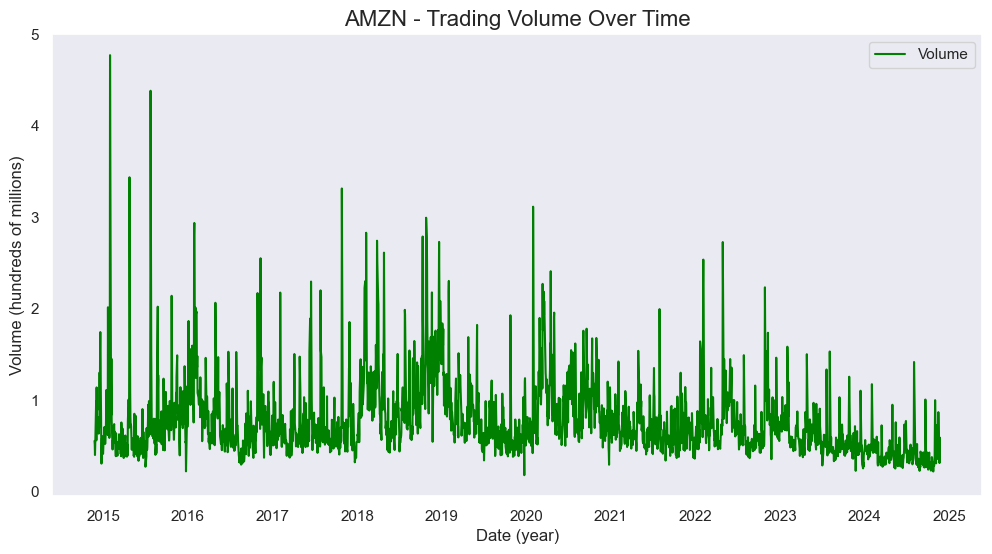

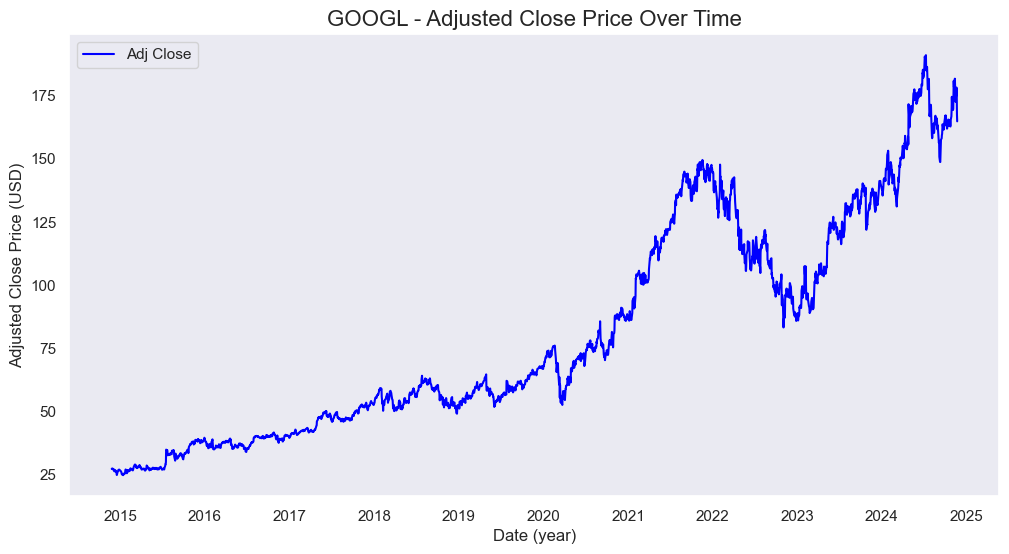

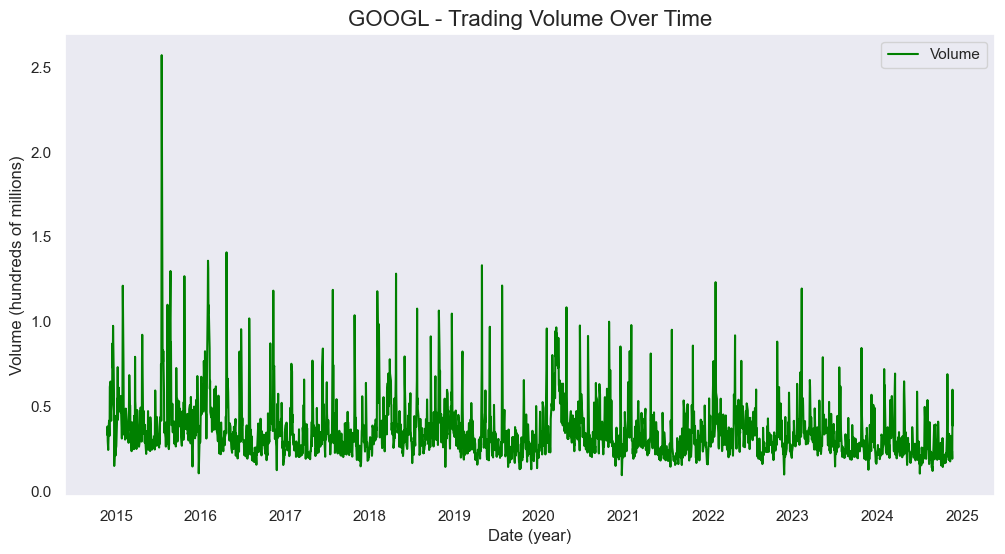

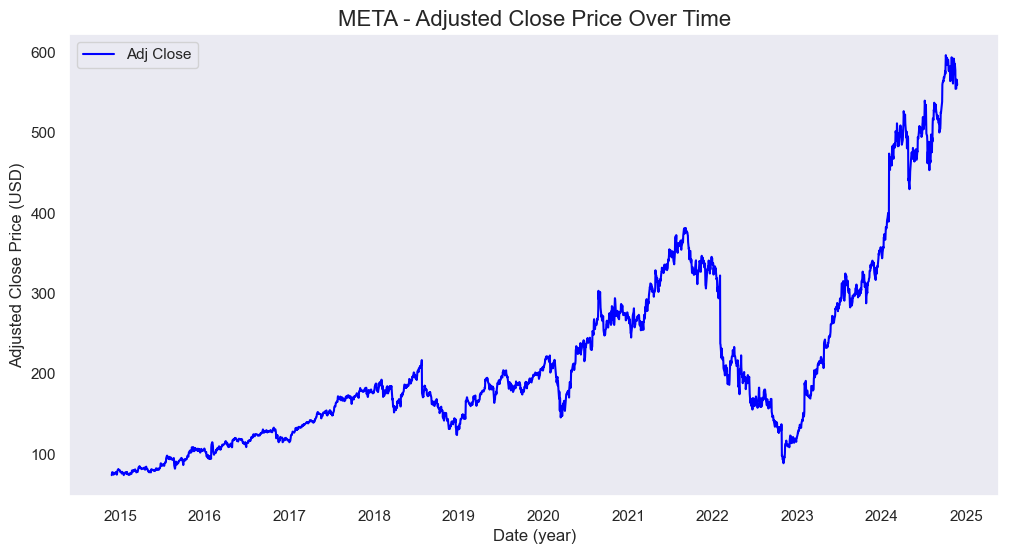

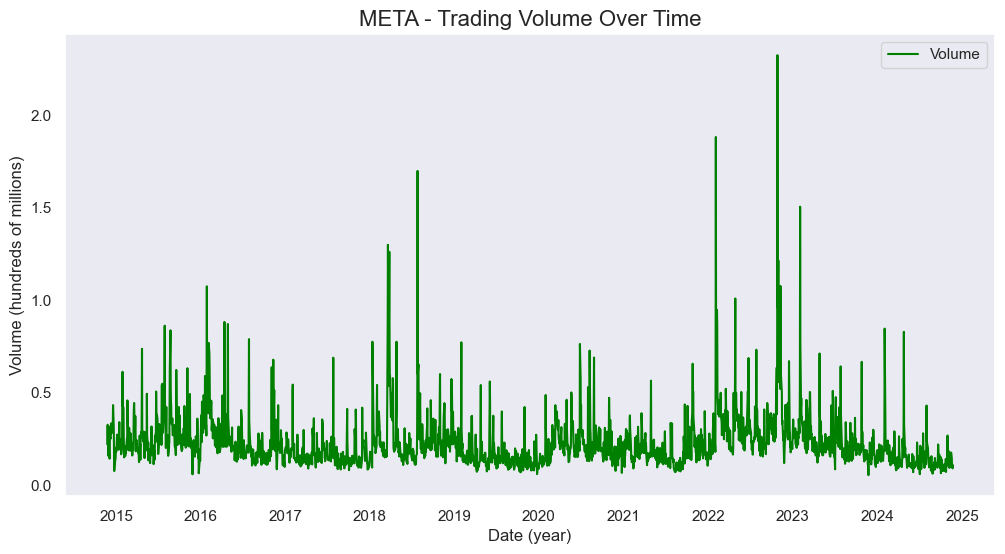

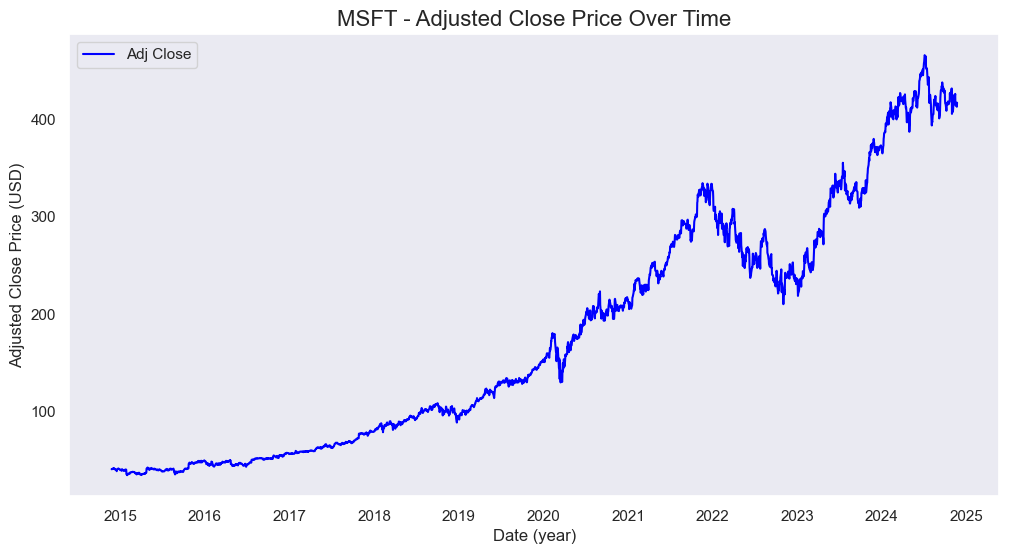

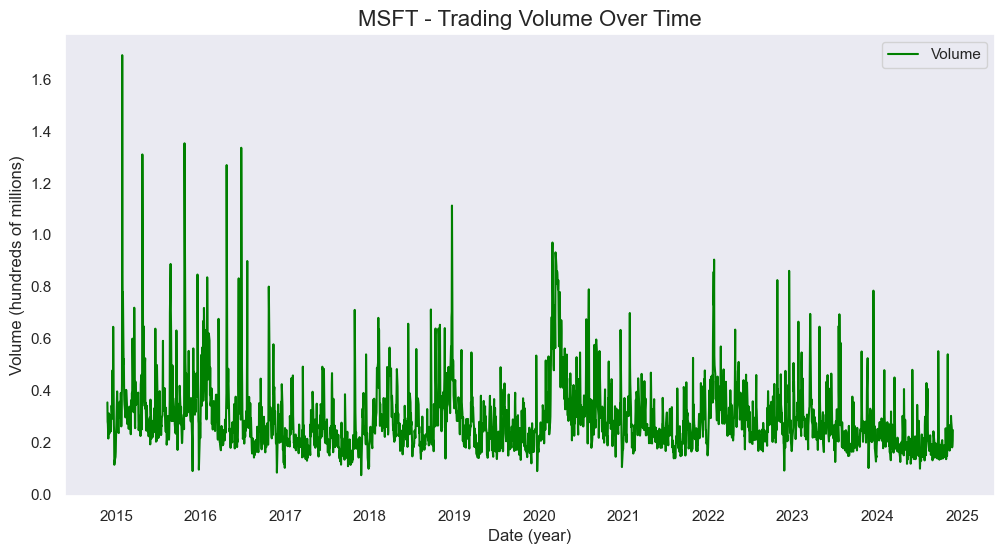

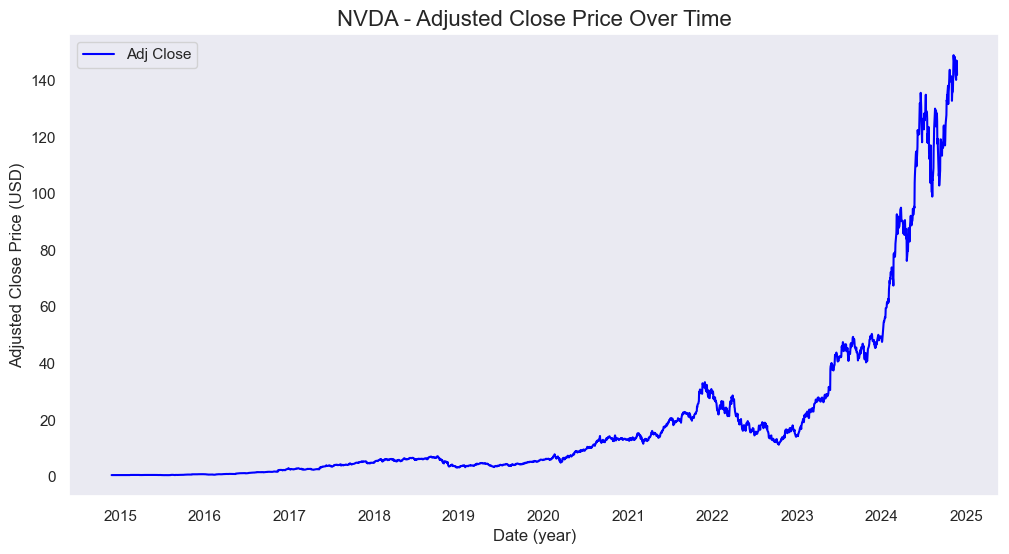

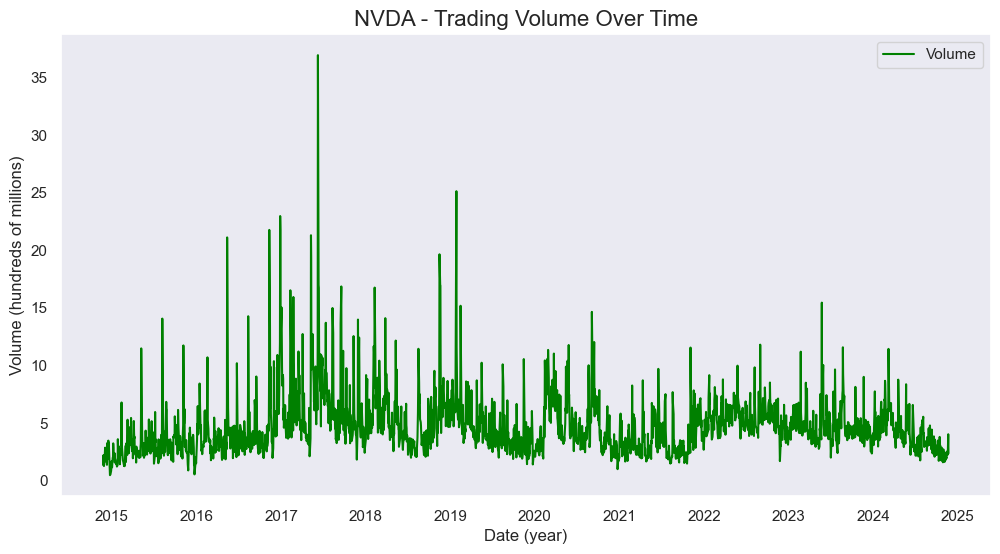

In [ ]:
for file in cleaned_file_paths:

    df_cleaned = pd.read_csv(file)

    # Converting the date to a proper format
    df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

    # Getting the stock ticker
    ticker = file.split("_")[1].split(".")[0]

    # Plot Adjusted Close prices
    plt.figure(figsize=(12, 6))
    plt.plot(
        df_cleaned["Date"], df_cleaned["Adj Close"], label="Adj Close", color="blue"
    )
    plt.title(f"{ticker} - Adjusted Close Price Over Time", fontsize=16)
    plt.xlabel("Date (year)", fontsize=12)
    plt.ylabel("Adjusted Close Price (USD)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    # Scale Volume to hundreds of millions (1e8)
    df_cleaned["Volume"] = df_cleaned["Volume"] / 1e8

    # Plot Volume
    plt.figure(figsize=(12, 6))
    plt.plot(df_cleaned["Date"], df_cleaned["Volume"], label="Volume", color="green")
    plt.title(f"{ticker} - Trading Volume Over Time", fontsize=16)
    plt.xlabel("Date (year)", fontsize=12)
    plt.ylabel("Volume (hundreds of millions)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

#### **2. Scatter Plots for Price and Volume**

Scatter plots can visually represent the relationship between trading volume and adjusted closing price.

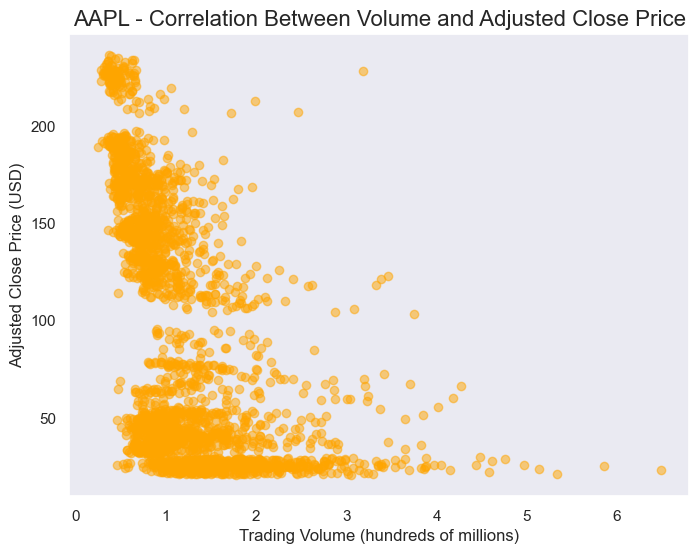

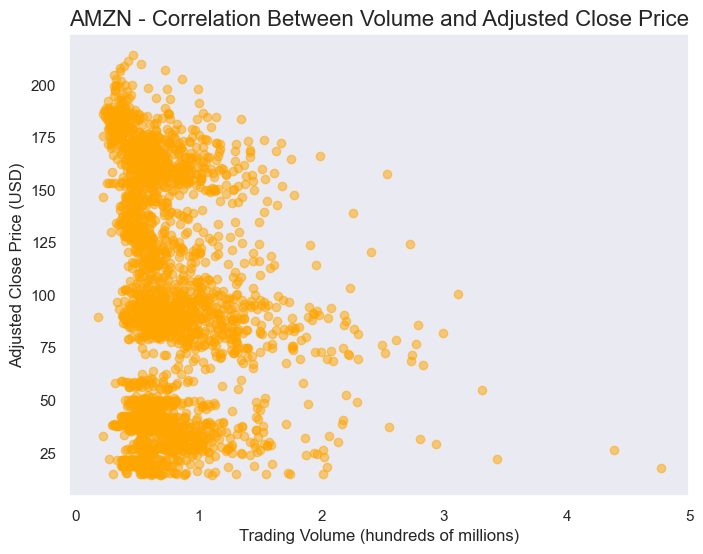

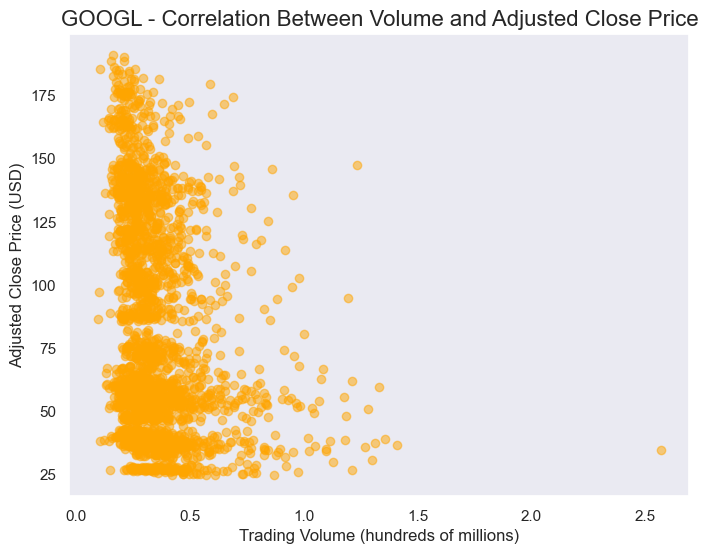

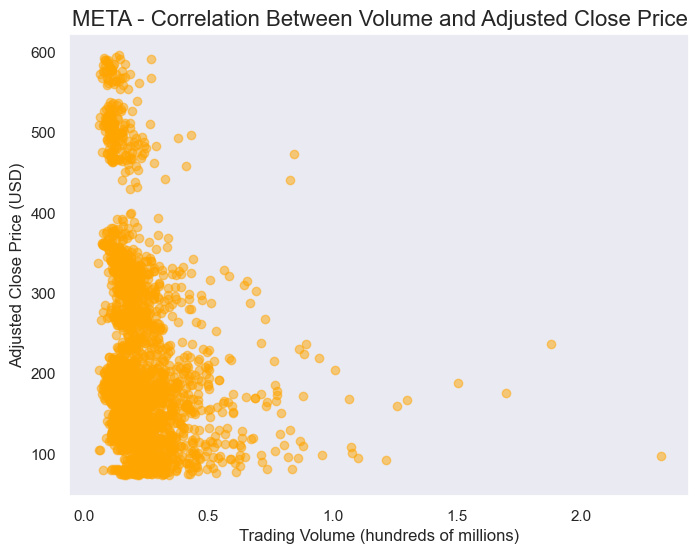

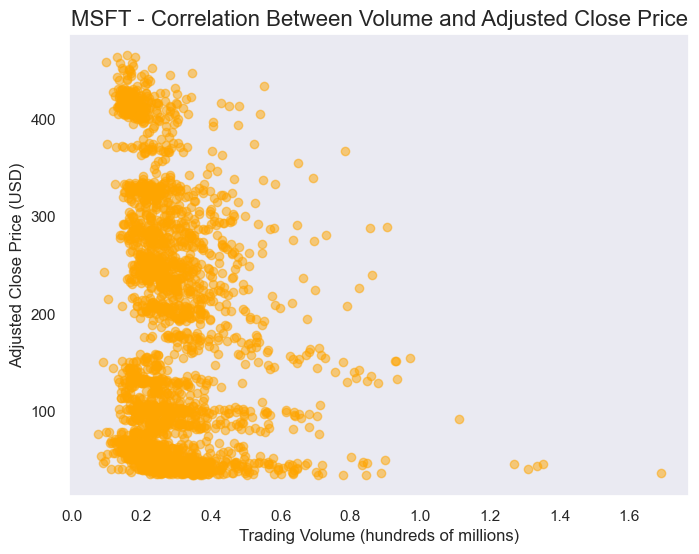

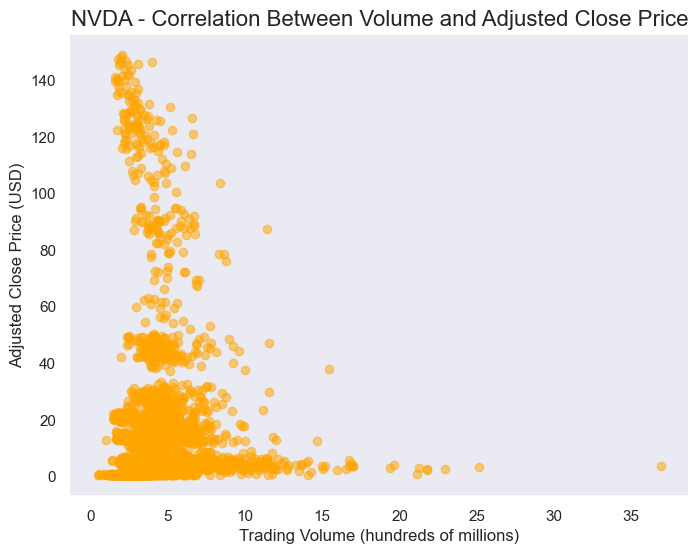

In [7]:
for file in cleaned_file_paths:
    df_cleaned = pd.read_csv(file)

    # Getting the stock ticker
    ticker = file.split("_")[1].split(".")[0]

    # Scale Volume to hundreds of millions (1e8)
    df_cleaned["Volume"] = df_cleaned["Volume"] / 1e8

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(
        df_cleaned["Volume"], df_cleaned["Adj Close"], alpha=0.5, color="orange"
    )
    plt.title(
        f"{ticker} - Correlation Between Volume and Adjusted Close Price", fontsize=16
    )
    plt.xlabel("Trading Volume (hundreds of millions)", fontsize=12)
    plt.ylabel("Adjusted Close Price (USD)", fontsize=12)
    plt.grid()
    plt.show()

#### **3.Segment Data for Most Recent Annual Earnings Reports of Each Company**

Analyze price and volume during specific events such as earnings reports to help better understand how trading activity responds to market events and whether it leads or lags price changes. A 5 day window before and after the earnings report was used to analyze how the trading acitivity reponds to such event.

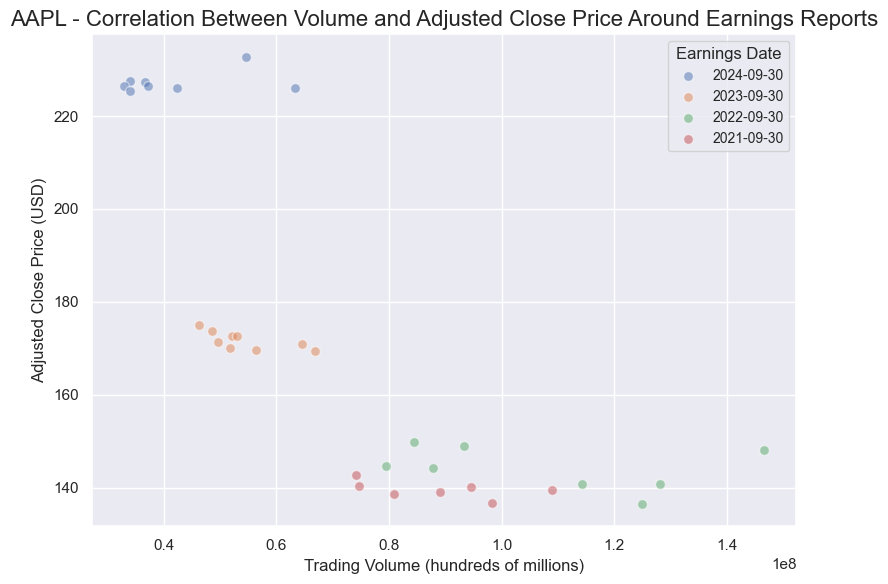

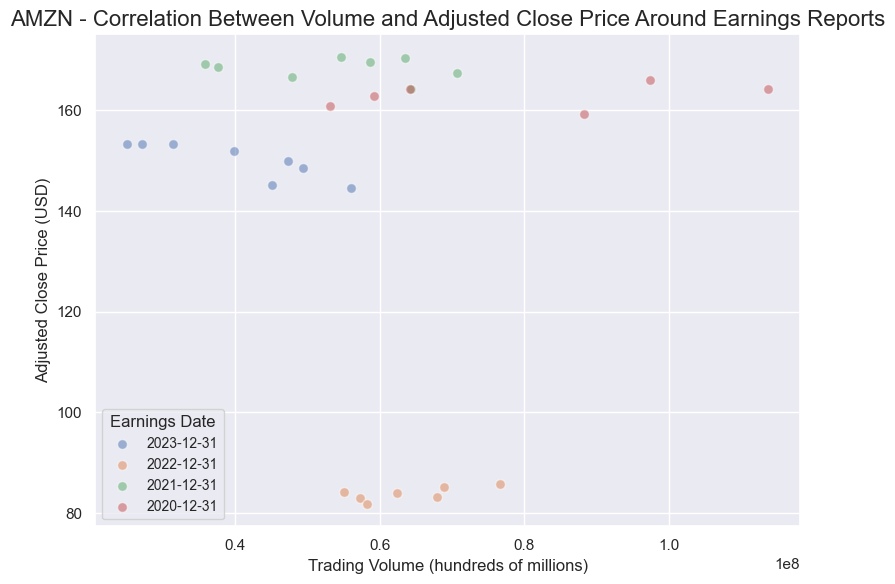

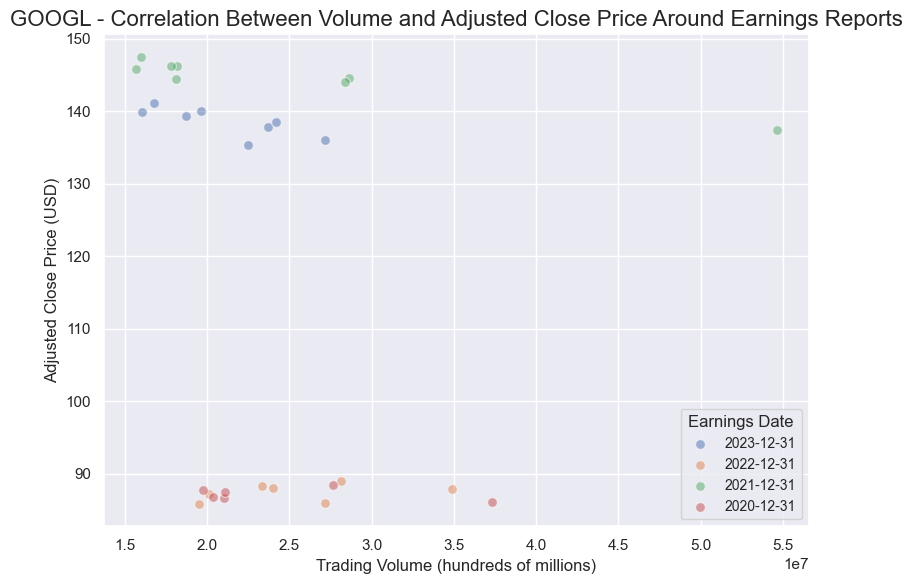

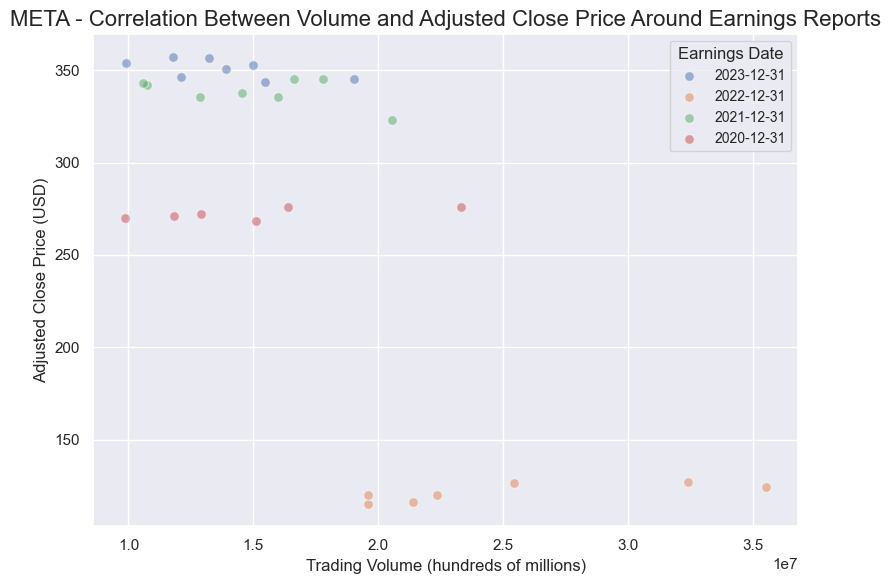

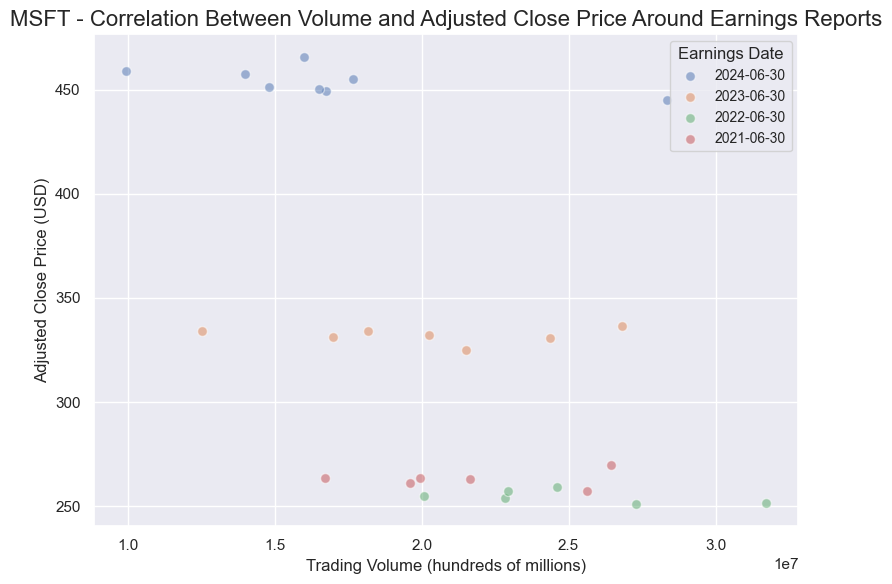

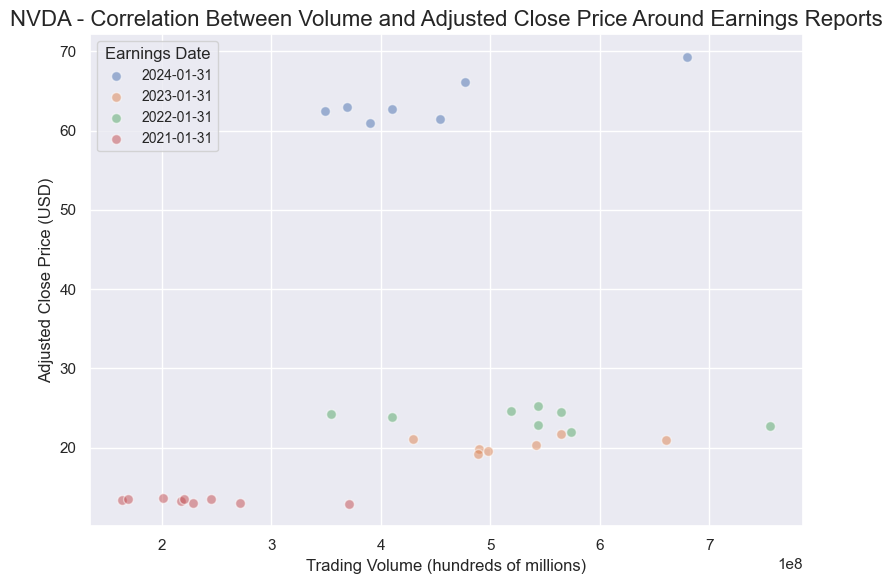

In [ ]:
earnings_dates = {
    "AAPL": ["2024-09-30", "2023-09-30", "2022-09-30", "2021-09-30"],
    "NVDA": ["2024-01-31", "2023-01-31", "2022-01-31", "2021-01-31"],
    "GOOGL": ["2023-12-31", "2022-12-31", "2021-12-31", "2020-12-31"],
    "AMZN": ["2023-12-31", "2022-12-31", "2021-12-31", "2020-12-31"],
    "META": ["2023-12-31", "2022-12-31", "2021-12-31", "2020-12-31"],
    "NFLX": ["2023-12-31", "2022-12-31", "2021-12-31", "2020-12-31"],
    "MSFT": ["2024-06-30", "2023-06-30", "2022-06-30", "2021-06-30" ],
}

for file in cleaned_file_paths:
    df_cleaned = pd.read_csv(file)

    # Converting date to a proper format
    df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

    # Getting the stock ticker
    ticker = file.split("_")[1].split(".")[0]

    # Create a scatter plot for all earnings reports for this ticker
    plt.figure(figsize=(8, 6))

    for earnings_date in earnings_dates[ticker]:
        # Set a window around the earnings report date (5 days before and after)
        window_start = pd.to_datetime(earnings_date) - pd.Timedelta(days=5)
        window_end = pd.to_datetime(earnings_date) + pd.Timedelta(days=5)

        # Filter the data for this window
        event_data = df_cleaned[
            (df_cleaned["Date"] >= window_start) & (df_cleaned["Date"] <= window_end)
        ]

        # Plot Volume vs Adjusted Close for this period
        plt.scatter(
            event_data["Volume"],
            event_data["Adj Close"],
            alpha=0.5,
            label=f"{earnings_date}",
            edgecolors="w",
            s=50,
        )

    plt.title(
        f"{ticker} - Correlation Between Volume and Adjusted Close Price Around Earnings Reports",
        fontsize=16,
    )
    plt.xlabel("Trading Volume (hundreds of millions)", fontsize=12)
    plt.ylabel("Adjusted Close Price (USD)", fontsize=12)
    plt.legend(title="Earnings Date", fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<br>

## **3. Discussion**

In conducting my analyses, I aimed to explore the trends and correlations related to key factors influencing stock performance. This includes adjusted close prices and trading volumes over a 10-year period for major companies like Meta, Apple, Amazon, Netflix, Nvidia, and Google. These factors were selected based on my understanding and interest of investments, market behavior, and trading dynamics. In addition to analyzing these factors, I became intrigued by identifying stock price movements during periods of high activity, especially around earnings reports. Statistically, this approach allowed me to highlight patterns in stock price movements and trading volumes which helped provide deeper insights into the market’s behavior during these crucial events. After completing my exploratory data analysis, several significant trends emerged which helped make multiple conclusions about the relationships between stock prices and trading volumes.

Upon examining the data, it was evident that over the 10-year period, stock prices for all six companies showed a consistent upward trend with adjusted close prices steadily increasing for each company. In contrast, trading volume remained relatively consistent throughout the period with some notable periods of heightened trading volume. Most companies traded within a volume range of 50-150 million shares whereas Nvidia was standing out as an outlier because the company had higher volumes in the range of 100-300 million shares. This suggests that while there were fluctuations in trading volume, they did not deviate drastically from the established norms except for Nvidia, which likely reflects its rapid growth and increasing market interest during this recent period.

Further analysis around earnings reports revealed that there were indeed some spikes in trading volume during these periods as anticipated. However, these spikes were not extreme; in fact, all companies continued to trade within their usual volume range of 50-150 million shares with only slight increases for some companies. This was measured five days before and after the earnings report. This pattern was observed consistently across the six companies indicating that while earnings reports may generate increased market activity, it does not lead to drastic changes in trading volume or a stock's price.

Finally, trading volume is an important metric in stock analysis and some increase in activity around earnings reports is evident; however, the relationship between stock price movements and trading volume does not show a strong or direct correlation. Despite the heightened volume around earnings events, there was no significant or consistent pattern that emerged between the increase in trading volume to a rise in stock price over time. This finding highlights that stock prices are influenced by many factors beyond trading volume alone. 

In conclusion, while trading volume plays a role in market dynamics, further analysis is needed to fully understand the various driving forces behind stock price movements. Many other factors such as market sentiment, external economic events, and company performance need to be analyzed to gain a deeper understanding of the complex relationship between stock prices and market activity. It is clear that a more holistic approach that considers a wider range of variables and their relationships is necessary to better determine the changes in stock prices. By incorporating other economic indicators, investor sentiment, and industry-specific factors, a more comprehensive model can be developed to better predict stock price movements and identify the key drivers behind market fluctuations.

<br>

## **4. References**

- Python Libraries: 
    - Pandas
    - Matplotlib
    - Numpy
    - Seaborn
    - yfinance (install using pip install yfinance)

<br>

- Helpful resources: 
    - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html 
    - https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax
    - https://finance.yahoo.com/quote/AAPL/financials/
    - https://ca.finance.yahoo.com/quote/NVDA/financials/
    - https://ca.finance.yahoo.com/quote/GOOG/financials/
    - https://ca.finance.yahoo.com/quote/AMZN/financials/
    - https://ca.finance.yahoo.com/quote/NFLX/financials/
    - https://ca.finance.yahoo.com/quote/META/financials/
    - https://chatgpt.com/ - Prompt used: "How to download historical stock data from Yahoo Finance?"
    - https://www.geeksforgeeks.org/how-to-plot-a-time-series-in-matplotlib/
    - https://www.w3schools.com/python/matplotlib_scatter.asp


